<a target="_blank" href="https://colab.research.google.com/github/cerr/pyCERR-Notebooks/blob/main/batch_visualize_scan_seg_ex1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Visualize scan and segmentation for a batch of dicom datasets

This notebook provides a tool to readliy check quality of underlying data before running analysis. The example below demonstrates visualizing CT scan and tumor segmentation for a batch of DICOM datasets. Central axial slice for tumor segmentation is shown in this example. Users have access to the entire metadata via CERR's plan container object (planC), so the notebook can be customized to display different slices or image layers.

### Install pyCERR

In [1]:
%%capture
!pip install "pyCERR[napari] @ git+https://github.com/cerr/pyCERR"

### Install Virtual Frame Buffer for Napari viewer

This step is required when a physical display is unavaiable. e.g. Google Colab. Otherwise skip to the next cell.

In [2]:
!export NAPARI_APPLICATION_IPY_INTERACTIVE=0
!export QT_DEBUG_PLUGINS=1 > /dev/null 2>&1
!apt-get update > /dev/null 2>&1
!apt-get install libqt5x11extras5-dev > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
from pyvirtualdisplay import Display
virtualDisplay = Display(backend="xvfb", size=(600, 600))
virtualDisplay.start()


## Visualize scan and segmentation

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/pat_1
('PAT1', 'PAT1', '1.3.6.1.4.1.9590.100.1.2.96328687310426543129572151154132284399', '1.3.6.1.4.1.9590.100.1.2.258301620411152643708006163321128526885', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT')
('PAT1', 'PAT1', '1.3.6.1.4.1.9590.100.1.2.96328687310426543129572151154132284399', '1.3.6.1.4.1.9590.100.1.2.296658988911737913102339329841519593982', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT')


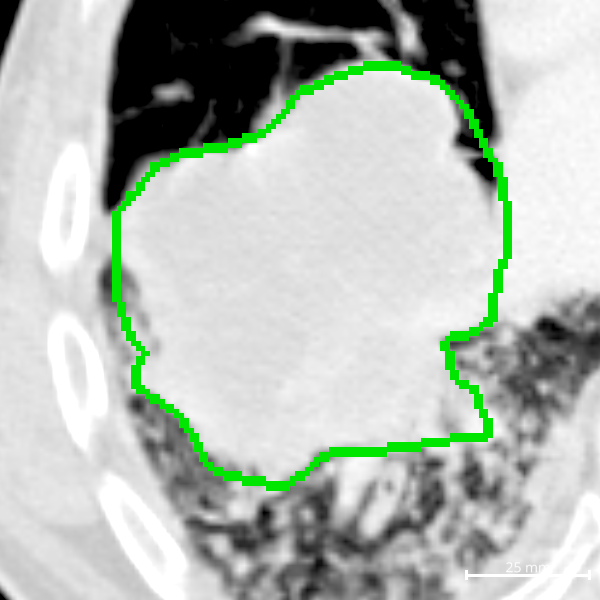

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/pat_2
('PAT2', 'PAT2', '1.3.6.1.4.1.9590.100.1.2.186722590312853886701735768582616095132', '1.3.6.1.4.1.9590.100.1.2.16016500911558447542485925491404262309', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT')
('PAT2', 'PAT2', '1.3.6.1.4.1.9590.100.1.2.186722590312853886701735768582616095132', '1.3.6.1.4.1.9590.100.1.2.83077934412344456434331598470407844553', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT')


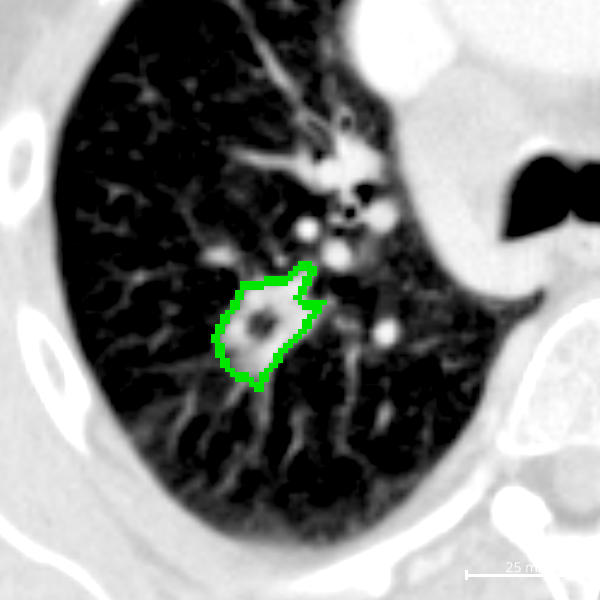

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/pat_3
('PAT3', 'PAT3', '1.3.6.1.4.1.9590.100.1.2.409070330913773454628579649303466119021', '1.3.6.1.4.1.9590.100.1.2.351624503710776750911285093361744472924', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT')
('PAT3', 'PAT3', '1.3.6.1.4.1.9590.100.1.2.409070330913773454628579649303466119021', '1.3.6.1.4.1.9590.100.1.2.357624831212820688235812622582660063404', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT')


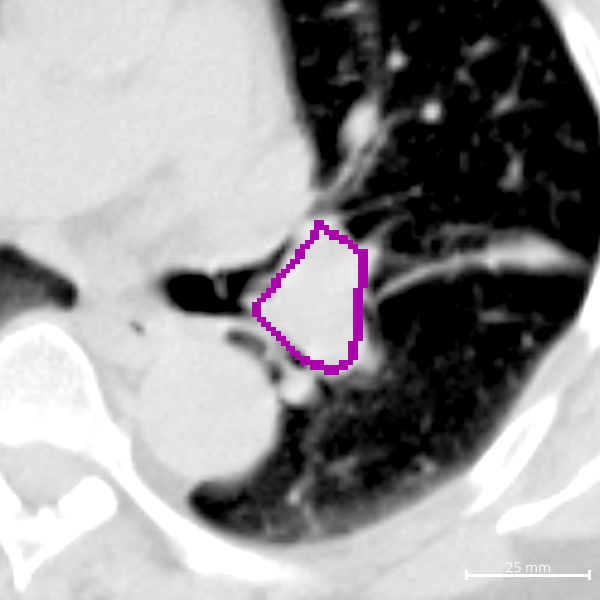

Data dir :/usr/local/lib/python3.10/dist-packages/cerr/datasets/radiomics_phantom_dicom/pat_4
('PAT4', 'PAT4', '1.3.6.1.4.1.9590.100.1.2.136596769910803090206945148270543894255', '1.3.6.1.4.1.9590.100.1.2.106284251511039171728979245242481617976', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT', 'RTSTRUCT')
('PAT4', 'PAT4', '1.3.6.1.4.1.9590.100.1.2.136596769910803090206945148270543894255', '1.3.6.1.4.1.9590.100.1.2.302171868711114827615998050902174932584', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT', 'CT')


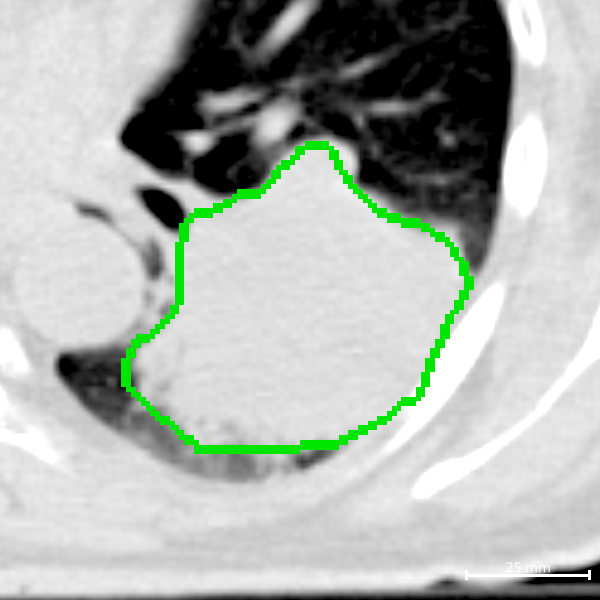

In [3]:
from IPython.display import Image, display
from cerr import datasets
import os
phantom_dir = os.path.join(os.path.dirname(datasets.__file__),'radiomics_phantom_dicom')
pat_names = ['pat_1', 'pat_2', 'pat_3', 'pat_4']
all_pat_dirs = [os.path.join(phantom_dir, pat) for pat in pat_names]
from cerr import plan_container as pc
from cerr import viewer as vwr
from skimage.io import imsave, imshow
for pt_dir in all_pat_dirs:
    print("Data dir :" + pt_dir)
    planC = pc.loadDcmDir(pt_dir)
    scanNum = [0]
    doseNum = []
    strNum = 0
    vectorDict = {}
    viewer, scan_layer, struct_layer, dose_layer, dvf_layer = \
        vwr.showNapari(planC, scan_nums=scanNum, struct_nums=strNum, dose_nums=doseNum, vectors_dict={}, displayMode='2d')

    scan_layer[0].opacity = 1
    scan_layer[0].contrast_limits_range = [-800, 200]
    scan_layer[0].contrast_limits = [-800, 200]
    scan_layer[0].gamma = 0.7
    viewer.camera.zoom = 50
    #viewer.camera.center = (0, 100, 100)
    screenshot = viewer.screenshot(size =(600, 600))
    viewer.close()
    fname = 'img.png'
    imsave(fname, screenshot)
    display(Image(filename=fname, retina=False, width=200, embed=True))
